In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Logo/Desktop/Ai project/Retail-Buyer-Segmentation/Classification/retail_customers_with_3_clusters.csv")


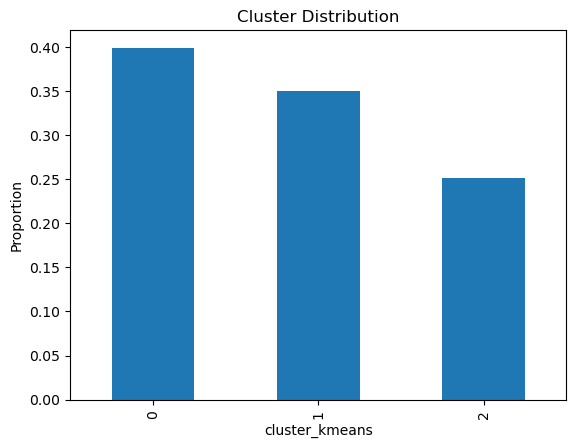

In [3]:
import matplotlib.pyplot as plt

df['cluster_kmeans'].value_counts(normalize=True).plot(kind='bar')
plt.title('Cluster Distribution')
plt.ylabel('Proportion')
plt.show()

In [4]:
selected_features = [
    "annual_income",
    "spend_wine", "spend_fruits", "spend_meat", "spend_fish",
    "spend_sweets", "spend_gold",
    "num_web_purchases", "num_catalog_purchases", "num_store_purchases",
    "num_discount_purchases",
]

categorical_features = df[selected_features].select_dtypes(include=['object', 'category']).columns.tolist()


print("Categorical features:", categorical_features)

Categorical features: []


In [9]:
from sklearn.preprocessing import StandardScaler

numeric_features = [
    "annual_income",
    "spend_wine", "spend_fruits", "spend_meat", "spend_fish",
    "spend_sweets", "spend_gold",
    "num_web_purchases", "num_catalog_purchases", "num_store_purchases",
    "num_discount_purchases"
]

X_numeric = df[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

df[numeric_features] = X_scaled

print(df[numeric_features].head())

   annual_income  spend_wine  spend_fruits  spend_meat  spend_fish  \
0       0.237795    0.983039      1.555891    1.679897    2.472613   
1      -0.235728   -0.869809     -0.635829   -0.712937   -0.650361   
2       0.778811    0.362454      0.573396   -0.176765    1.352017   
3      -1.026594   -0.869809     -0.560253   -0.650900   -0.503398   
4       0.244019   -0.388781      0.422243   -0.216645    0.157938   

   spend_sweets  spend_gold  num_web_purchases  num_catalog_purchases  \
0      1.474698    0.851872           1.408311               2.513430   
1     -0.631575   -0.729495          -1.109798              -0.568286   
2     -0.147374   -0.035236           1.408311              -0.225873   
3     -0.583155   -0.748780          -0.750068              -0.910699   
4     -0.002114   -0.555930           0.329121               0.116540   

   num_store_purchases  num_discount_purchases  
0            -0.551351                0.349491  
1            -1.166165               -0.16

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

selected_features = [
    "annual_income",
    "spend_wine", "spend_fruits", "spend_meat", "spend_fish",
    "spend_sweets", "spend_gold",
    "num_web_purchases", "num_catalog_purchases", "num_store_purchases",
    "num_discount_purchases",
]

X = df[selected_features].values
y = df["cluster_kmeans"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)


print("SVM TRAIN Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision (macro):", precision_score(y_train, y_train_pred, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))

SVM TRAIN Metrics:
Accuracy: 0.7469204927211646
Precision (macro): 0.7131357009843596
Recall (macro): 0.7124148361318952
F1 Score (macro): 0.7109856554363291


In [6]:
# Train Metrics
print("SVM TRAIN Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision (macro):", precision_score(y_train, y_train_pred, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))

# Test Metrics
print("\nSVM TEST Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision (macro):", precision_score(y_test, y_test_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))


SVM TRAIN Metrics:
Accuracy: 0.7469204927211646
Precision (macro): 0.7131357009843596
Recall (macro): 0.7124148361318952
F1 Score (macro): 0.7109856554363291

SVM TEST Metrics:
Accuracy: 0.7740492170022372
Precision (macro): 0.7475894415357766
Recall (macro): 0.7446082393708092
F1 Score (macro): 0.7446720089125153


In [7]:
cv_f1 = cross_val_score(svm_model, X, y, cv=5, scoring='f1_macro')
print("\nCross-validation F1 scores:", cv_f1)
print("Mean CV F1:", cv_f1.mean())


Cross-validation F1 scores: [0.69582835 0.70855832 0.71264728 0.77092398 0.7155663 ]
Mean CV F1: 0.7207048463676788
